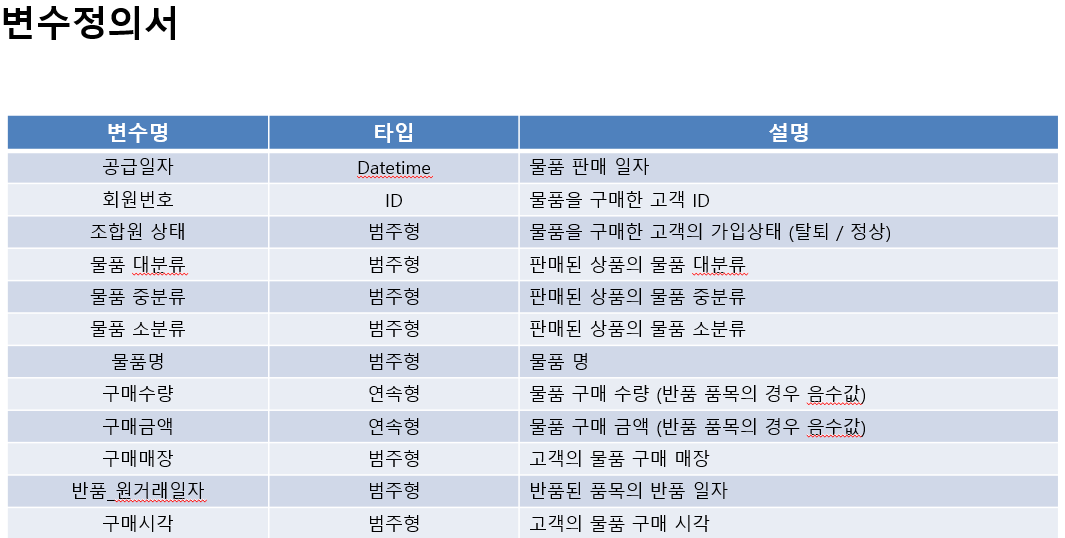


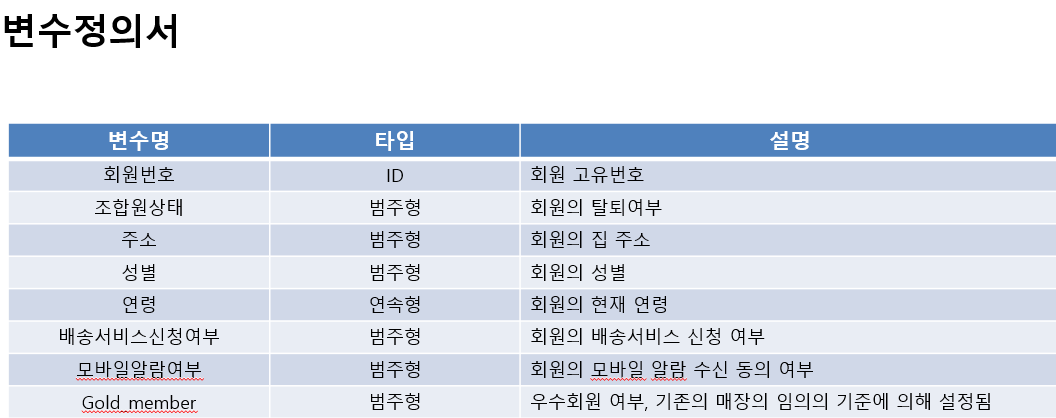

In [ ]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
#한글 폰트 적용
matplotlib.rc('font', family='Malgun Gothic')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.stattools import omni_normtest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# 그래프에 retina display 적용

%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정

plt.rc('font', family='NanumBarunGothic') 


## <font color='Blue'><div style="text-align: left">월별 품목 판매량 </font> 

In [ ]:
df = pd.read_csv('/content/drive/My Drive/(개인)_AI _빅데이터_아카데미/B1_마켓_DataSet/product_member_data.csv',engine='python',encoding='euc-kr')
df.head()

,Unnamed: 0,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,hour,연령,연령대,주소,성별,배송서비스신청여부,모바일알람여부,Gold_member
0,0,2018-01-02,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04,10,45,40,수지구-풍덕천동,여,미신청,수신,VIP
1,1,2018-01-02,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09,10,34,30,수지구-풍덕천동,여,미신청,.,normal
2,2,2018-01-02,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12,10,51,50,수지구-성복동,여,신청,.,normal
3,3,2018-01-02,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23,10,69,60,수지구-풍덕천동,여,미신청,.,VIP
4,4,2018-01-02,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29,10,73,70,수지구-풍덕천동,여,미신청,.,normal


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_m = df[['공급일자','물품대분류']]

In [ ]:
df_m.head()

,공급일자,물품대분류
0,2018-01-02,과실
1,2018-01-02,간식
2,2018-01-02,채소
3,2018-01-02,축산물
4,2018-01-02,양념/가루


In [ ]:
# df_m.공급일자 = pd.to_datetime(df_m.공급일자)
# df_m.set_index('공급일자', inplace=True)

In [ ]:
df_m = pd.get_dummies(df_m['물품대분류'])

In [ ]:
df_m.head()

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,학교급식
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_m['공급일자'] = df['공급일자']

In [ ]:
df_m.head()

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,학교급식,공급일자
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-01-02
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-01-02
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2018-01-02
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2018-01-02
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2018-01-02


In [ ]:
df_m['공급일자'] = df_m['공급일자'].astype('datetime64[ns]')
df_m.head()

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,학교급식,공급일자
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-01-02
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-01-02
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2018-01-02
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2018-01-02
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2018-01-02


In [ ]:
df_m.dtypes

간식                uint8
건강                uint8
과실                uint8
기타                uint8
반찬                uint8
생활용품              uint8
서류                uint8
수산                uint8
양념/가루             uint8
음료                uint8
잡곡                uint8
주곡                uint8
주류                uint8
채소                uint8
축산물               uint8
학교급식              uint8
공급일자     datetime64[ns]
dtype: object

In [ ]:
df_m['월'] = df_m['공급일자'].dt.month

In [ ]:
df_m.head()

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,학교급식,공급일자,월
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-01-02,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-01-02,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2018-01-02,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2018-01-02,1
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2018-01-02,1


In [ ]:
df_m = df_m.groupby('월').sum()

In [ ]:
df_m

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,학교급식
월,,,,,,,,,,,,,,,,
1,5050.0,319.0,1119.0,2.0,3717.0,965.0,497.0,2624.0,1534.0,1165.0,394.0,407.0,43.0,6776.0,5766.0,0.0
2,4375.0,289.0,932.0,2.0,3262.0,947.0,536.0,2161.0,1481.0,1106.0,485.0,402.0,48.0,6547.0,4760.0,0.0
3,4691.0,303.0,937.0,94.0,3764.0,1311.0,486.0,2076.0,1346.0,1277.0,471.0,442.0,55.0,7659.0,5493.0,0.0
4,4605.0,352.0,646.0,24.0,3525.0,1076.0,394.0,2009.0,1311.0,1285.0,364.0,399.0,39.0,7576.0,4999.0,0.0
5,4744.0,304.0,559.0,17.0,3607.0,1086.0,199.0,1901.0,1376.0,1410.0,378.0,448.0,37.0,8148.0,5217.0,0.0
6,4444.0,266.0,549.0,8.0,3767.0,1054.0,356.0,1650.0,1352.0,1619.0,352.0,421.0,55.0,9109.0,5240.0,0.0
7,5186.0,270.0,681.0,93.0,3620.0,1283.0,220.0,1753.0,1455.0,1798.0,363.0,464.0,43.0,8774.0,5725.0,0.0
8,4845.0,210.0,872.0,5.0,3983.0,1029.0,330.0,2037.0,1328.0,1735.0,335.0,507.0,40.0,7845.0,5543.0,0.0
9,4292.0,299.0,1347.0,13.0,3600.0,1012.0,401.0,1903.0,1378.0,1323.0,346.0,538.0,61.0,6711.0,4695.0,0.0


In [ ]:
df_m_q1 = df_m[df_m.index <= 3]

In [ ]:
df_m_q2 = df_m[(df_m.index > 3) & (df_m.index <= 6)]

In [ ]:
df_m_q3 = df_m[(df_m.index > 6) & (df_m.index <= 9)]

In [ ]:
df_m_q4 = df_m[(df_m.index > 9) & (df_m.index <= 12)]

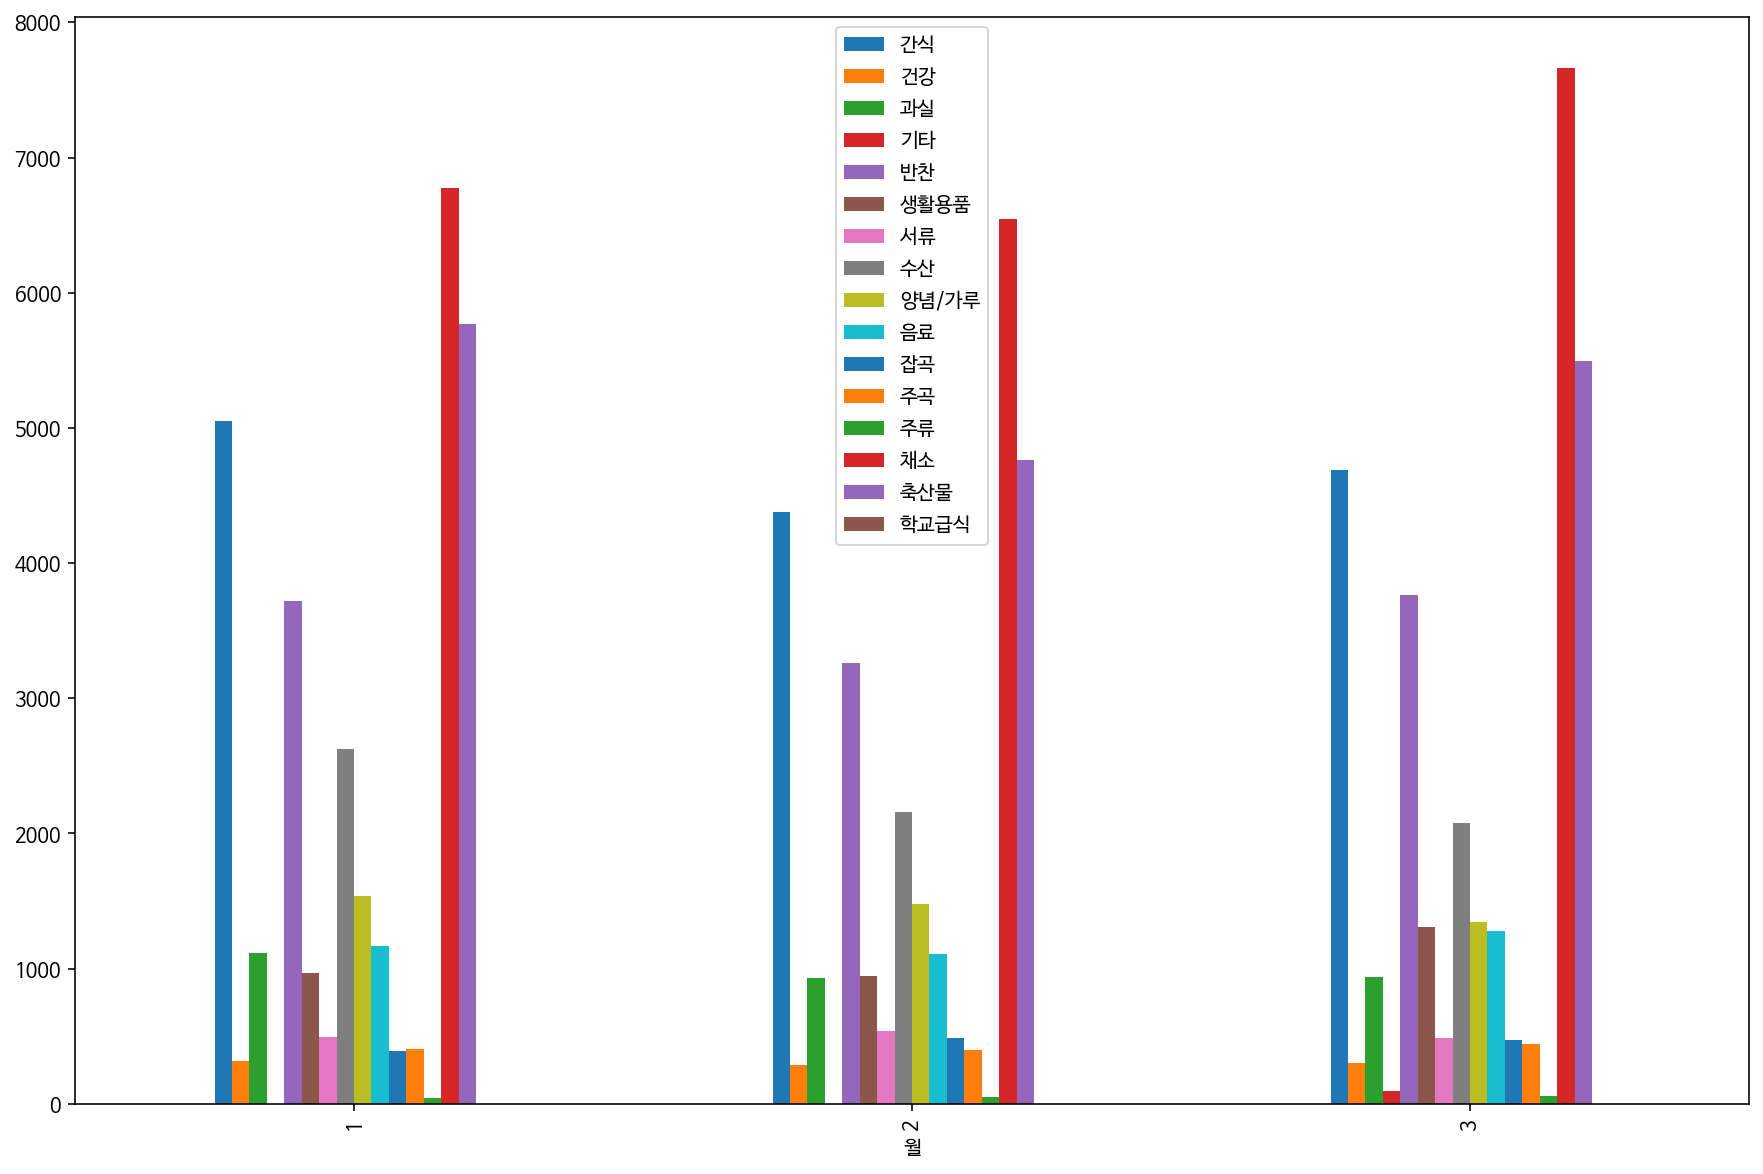

In [ ]:
df_m_q1.plot.bar(figsize = (15,10))

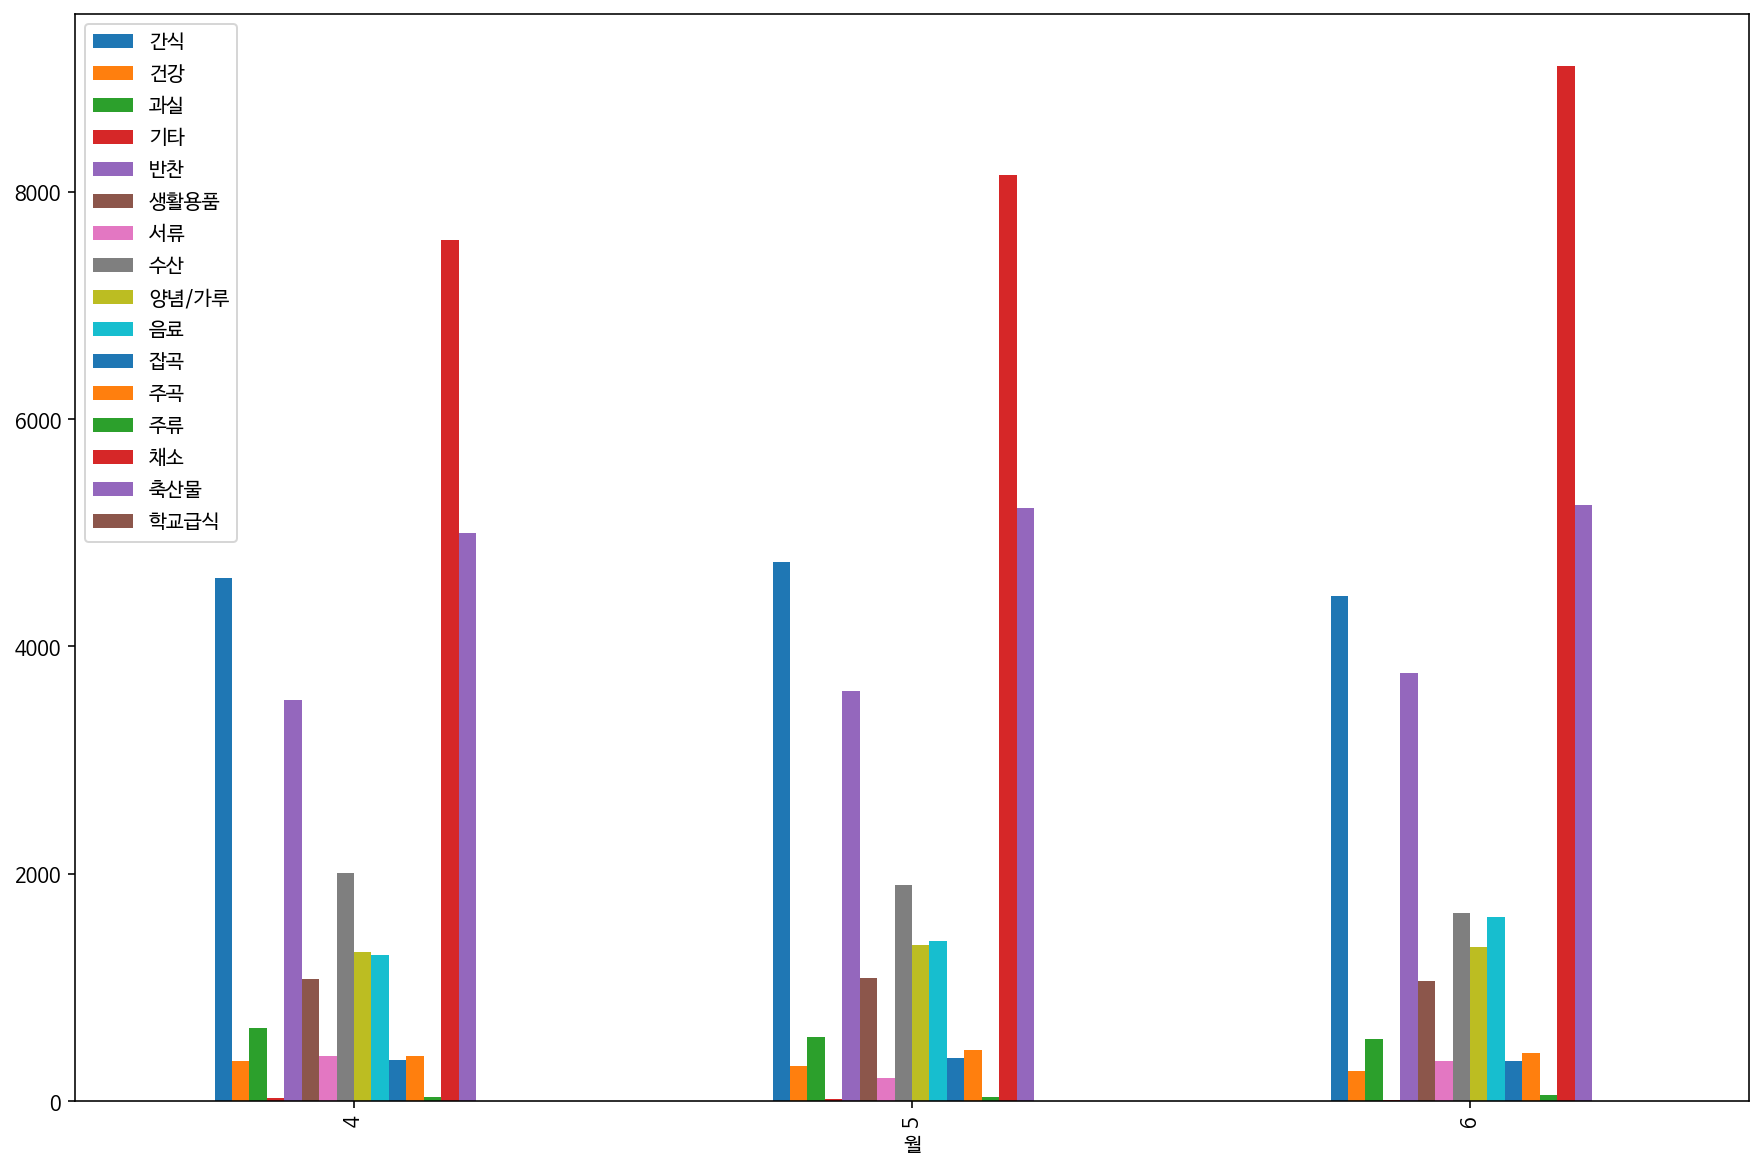

In [ ]:
df_m_q2.plot.bar(figsize = (15,10))

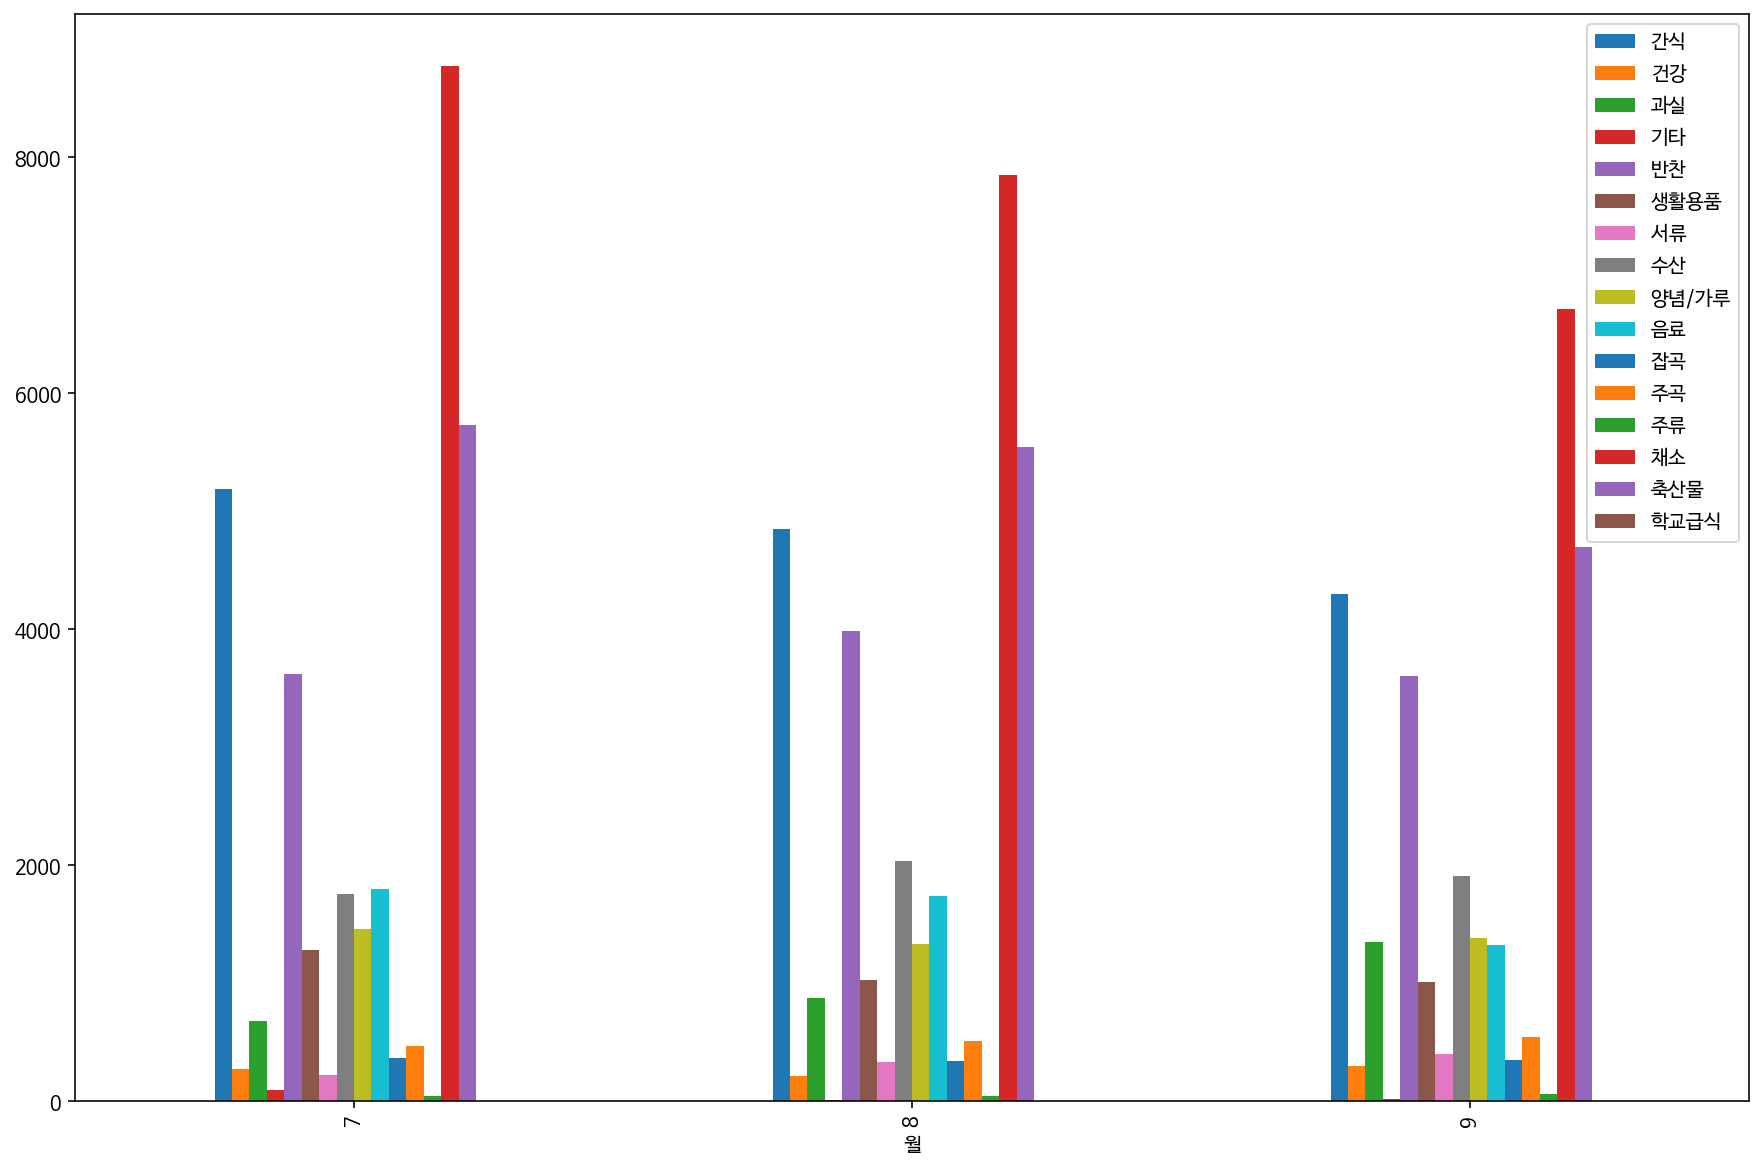

In [ ]:
df_m_q3.plot.bar(figsize = (15,10))

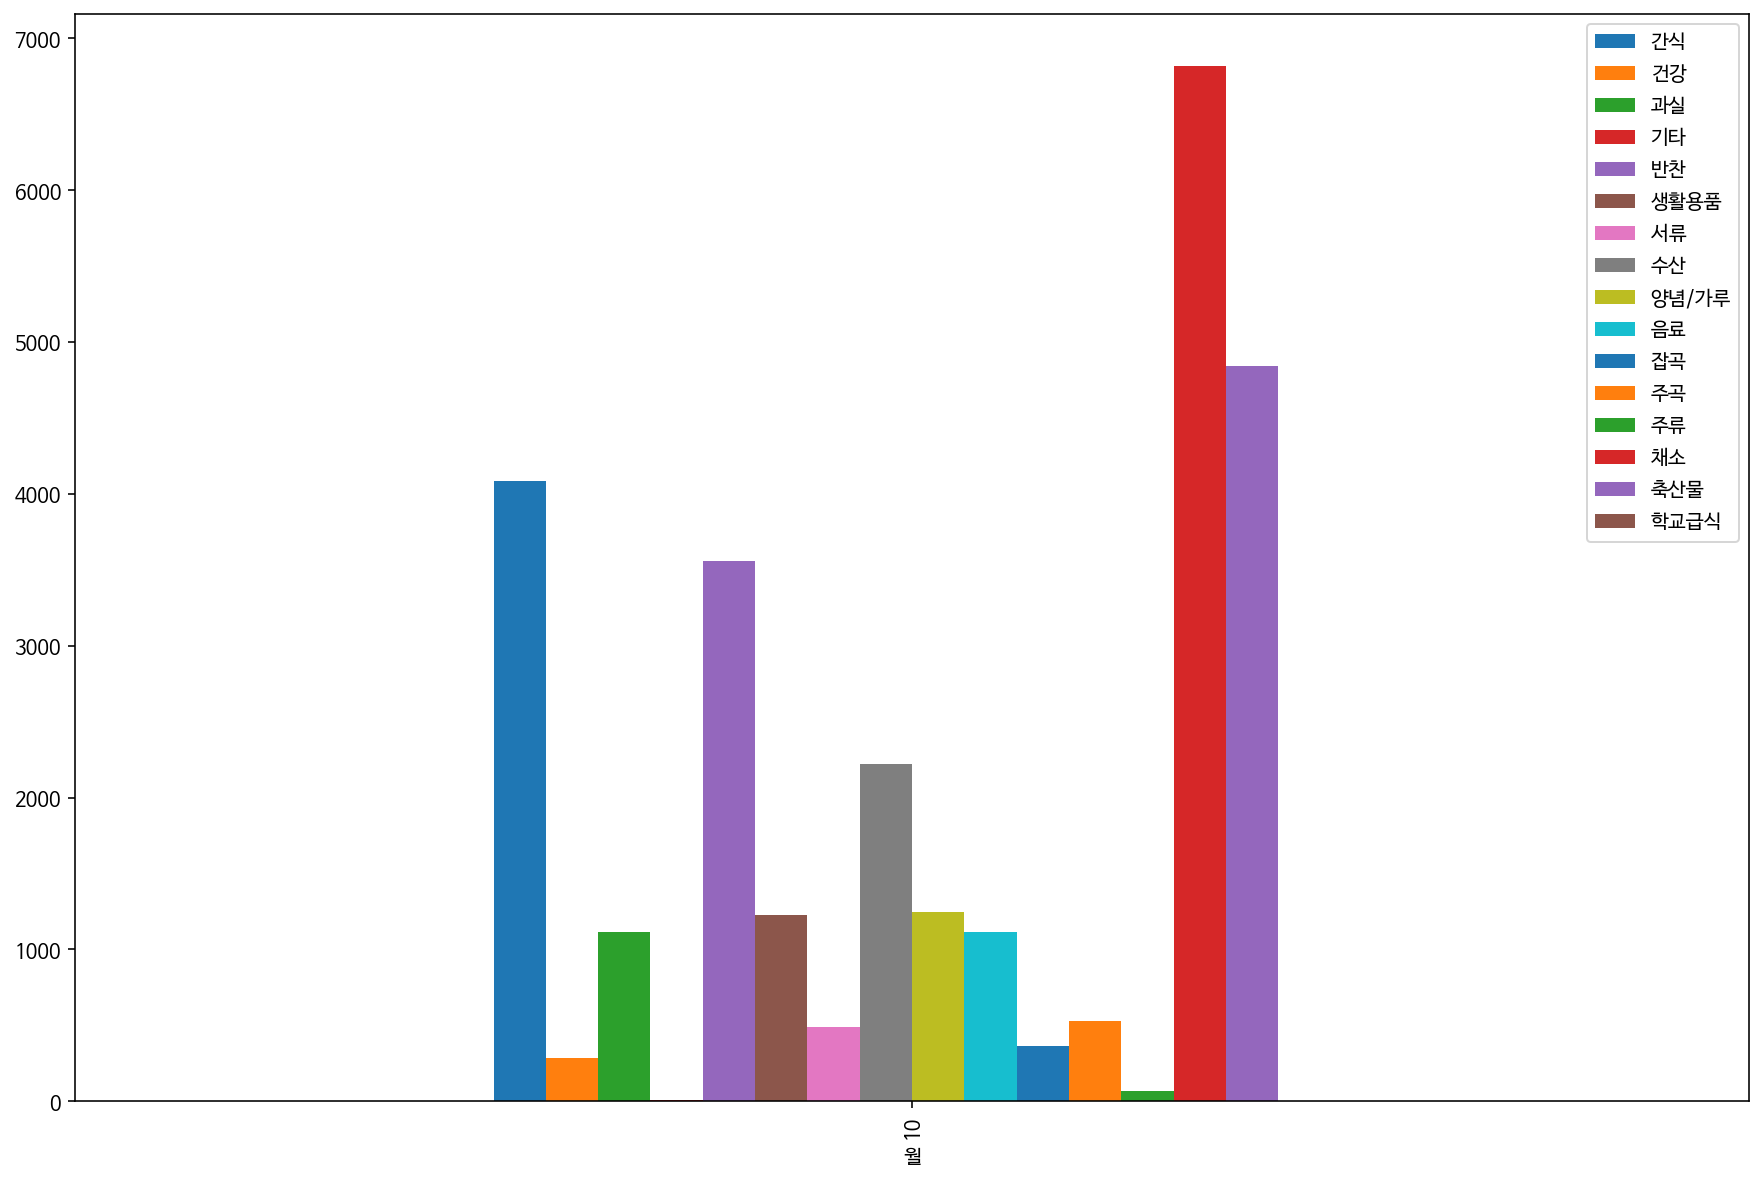

In [ ]:
df_m_q4.plot.bar(figsize = (15,10))

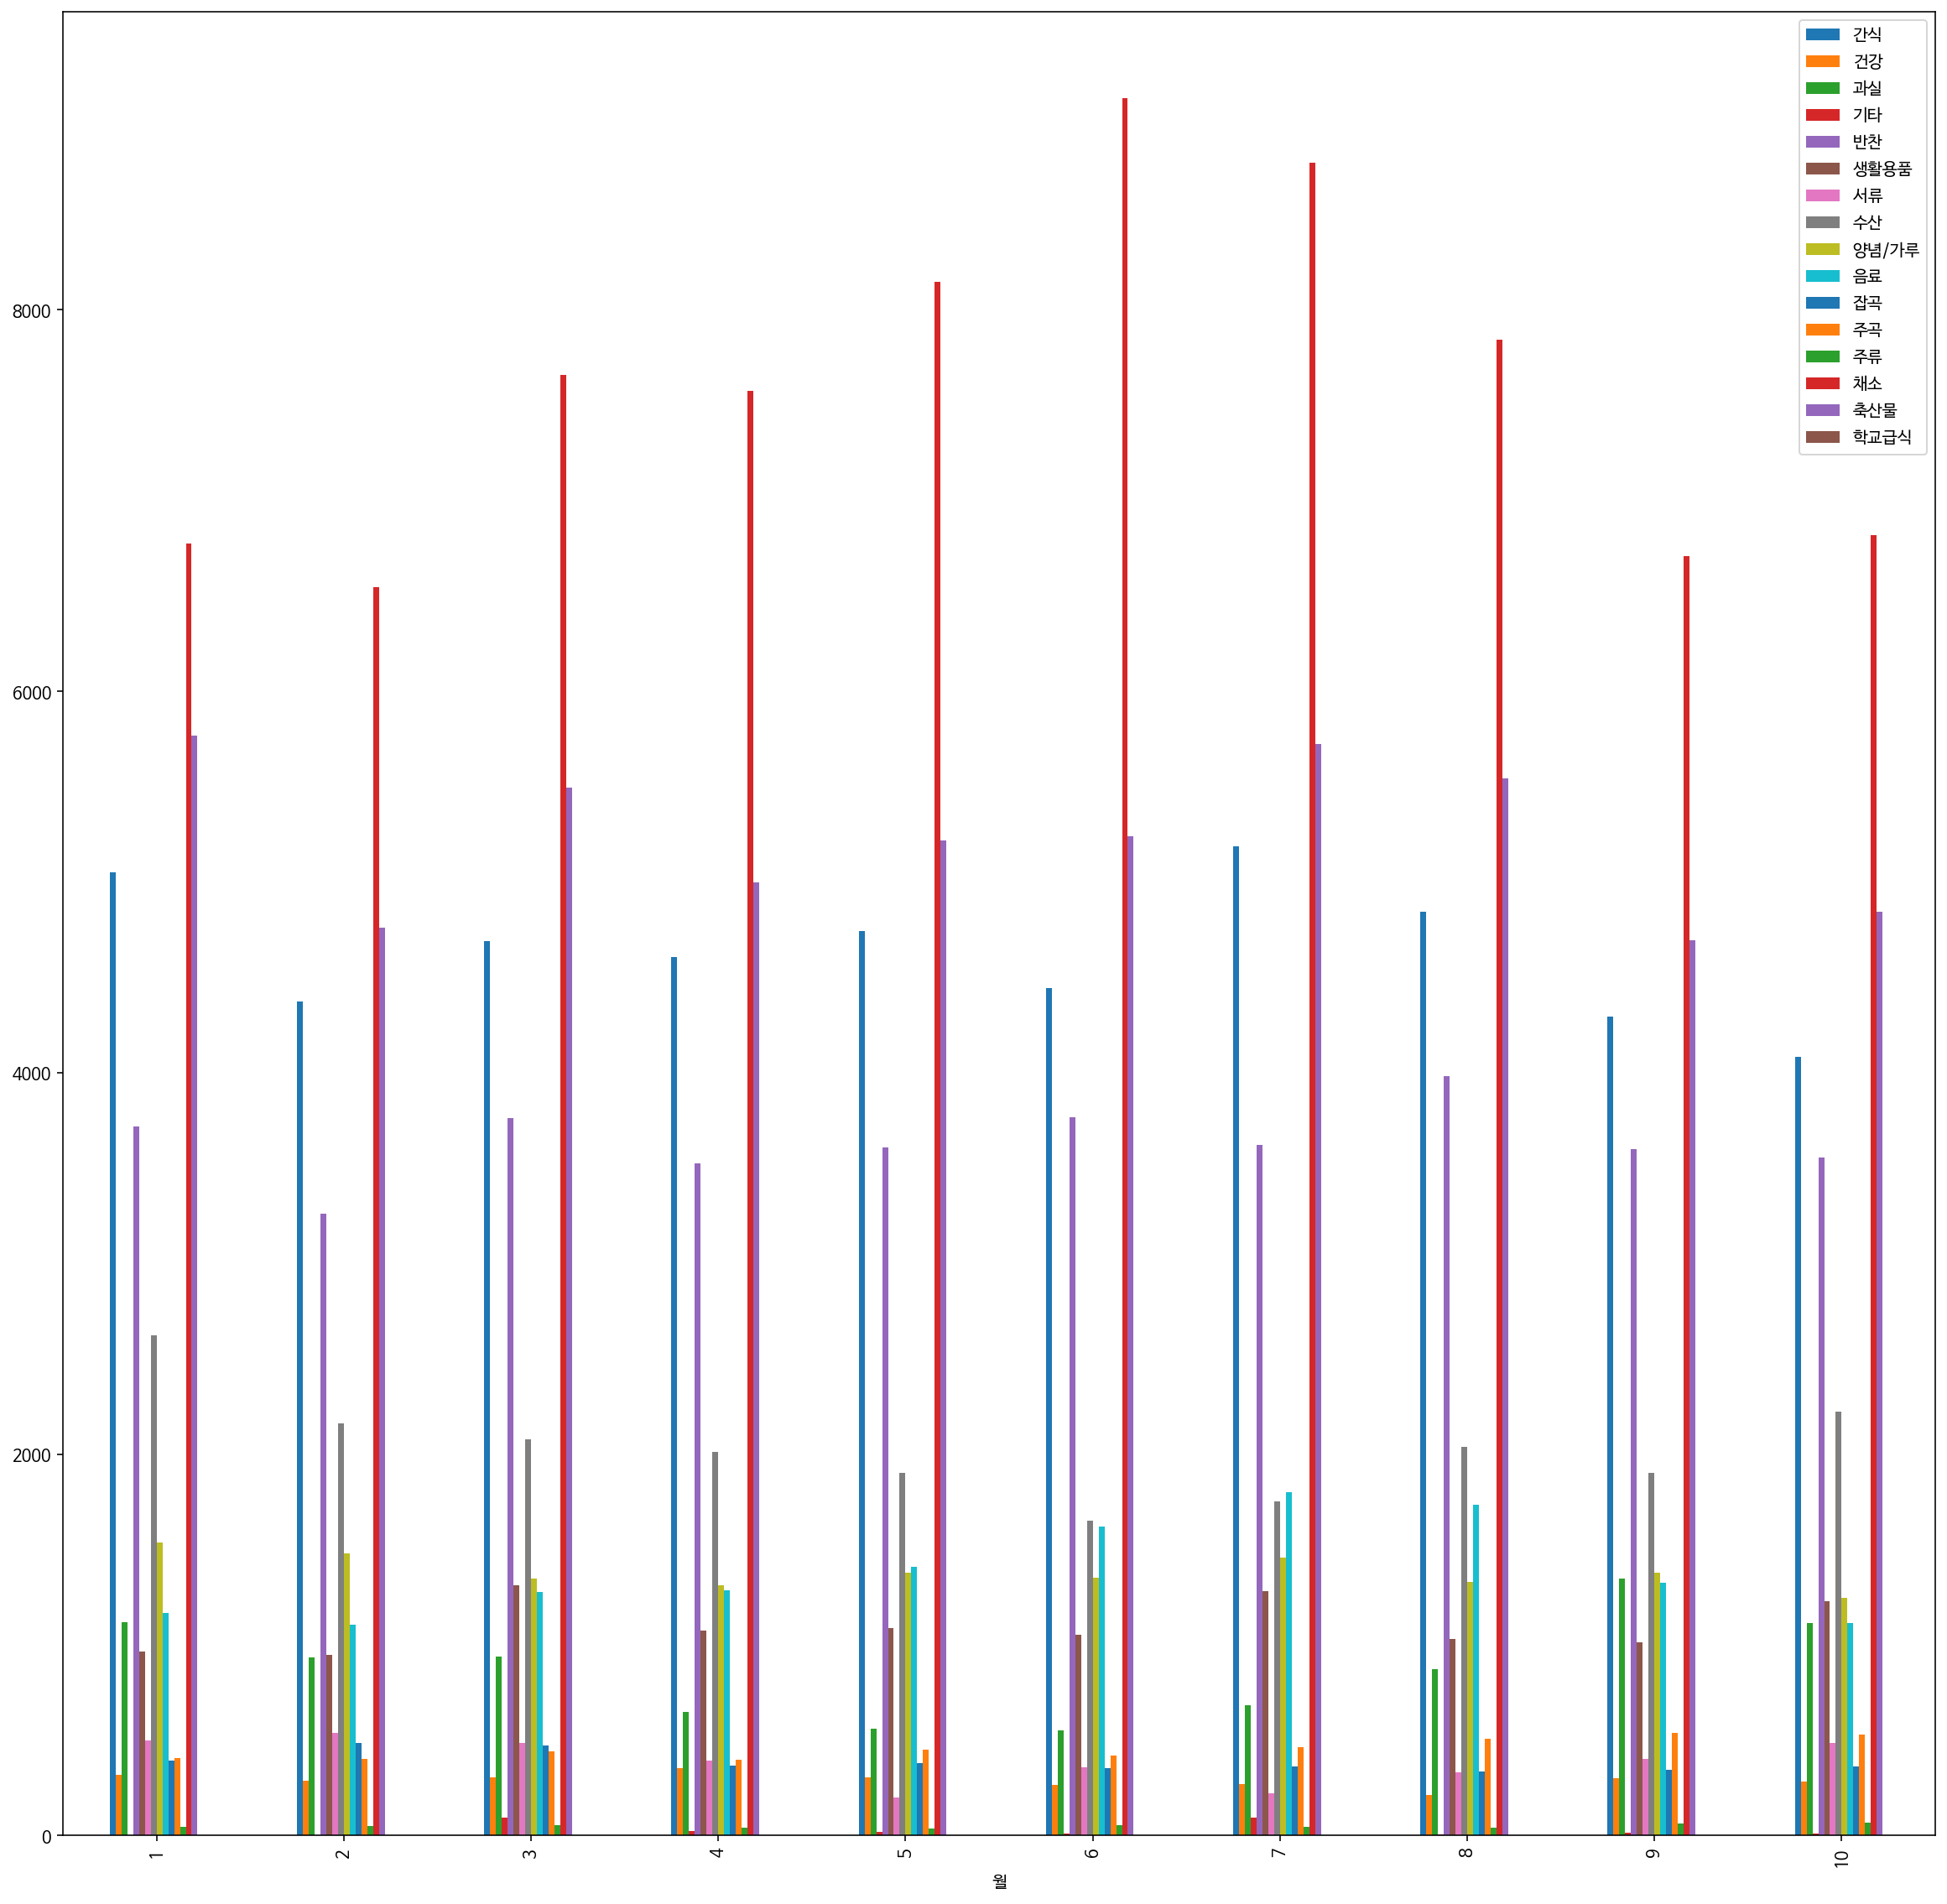

In [ ]:
df_m.groupby('월').sum().plot.bar(figsize = (20,20))


## <font color='Blue'><div style="text-align: left">일별 품목 판매량 </font> 

In [ ]:
df_m = df[['공급일자','물품대분류']]
df_m.head()

,공급일자,물품대분류
0,2018-01-02,과실
1,2018-01-02,간식
2,2018-01-02,채소
3,2018-01-02,축산물
4,2018-01-02,양념/가루


In [ ]:
df_m['공급일자'] = df_m['공급일자'].astype('datetime64[ns]')
df_m.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,공급일자,물품대분류
0,2018-01-02,과실
1,2018-01-02,간식
2,2018-01-02,채소
3,2018-01-02,축산물
4,2018-01-02,양념/가루


In [ ]:
df_m['일'] = df_m['공급일자'].dt.day

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_m = df_m.drop('공급일자',axis=1)
df_m.head()

,물품대분류,일
0,과실,2
1,간식,2
2,채소,2
3,축산물,2
4,양념/가루,2


In [ ]:
df_m_n = pd.get_dummies(df_m['물품대분류'])
df_m_n.head()

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,학교급식
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_m_n['일'] = df_m['일']
df_m_n.head()

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,학교급식,일
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2


In [ ]:
df_m_n = df_m_n.groupby('일').sum()
df_m_n.head()

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,학교급식
일,,,,,,,,,,,,,,,,
1,1303.0,86.0,295.0,0.0,1073.0,296.0,112.0,525.0,376.0,394.0,165.0,150.0,14.0,2176.0,1479.0,0.0
2,1577.0,110.0,306.0,3.0,1246.0,366.0,132.0,695.0,423.0,450.0,164.0,153.0,20.0,2631.0,1887.0,0.0
3,1485.0,90.0,286.0,2.0,1201.0,373.0,139.0,654.0,428.0,469.0,133.0,147.0,19.0,2597.0,1771.0,0.0
4,1496.0,96.0,244.0,4.0,1205.0,381.0,142.0,640.0,385.0,474.0,127.0,152.0,12.0,2566.0,1795.0,0.0
5,1377.0,85.0,235.0,5.0,1130.0,338.0,130.0,641.0,419.0,396.0,97.0,113.0,13.0,2252.0,1604.0,0.0


In [ ]:
df_m_n = df_m_n.drop(['기타','주류','주곡','잡곡','서류'],axis=1)

In [ ]:
df_m_n1 = df_m_n[df_m_n.index <= 7]
df_m_n1.head()

,간식,건강,과실,반찬,생활용품,수산,양념/가루,음료,채소,축산물,학교급식
일,,,,,,,,,,,
1,1303.0,86.0,295.0,1073.0,296.0,525.0,376.0,394.0,2176.0,1479.0,0.0
2,1577.0,110.0,306.0,1246.0,366.0,695.0,423.0,450.0,2631.0,1887.0,0.0
3,1485.0,90.0,286.0,1201.0,373.0,654.0,428.0,469.0,2597.0,1771.0,0.0
4,1496.0,96.0,244.0,1205.0,381.0,640.0,385.0,474.0,2566.0,1795.0,0.0
5,1377.0,85.0,235.0,1130.0,338.0,641.0,419.0,396.0,2252.0,1604.0,0.0


In [ ]:
df_m_n2 = df_m_n[(df_m_n.index > 7) & (df_m_n.index <= 14)]
df_m_n2.head()

,간식,건강,과실,반찬,생활용품,수산,양념/가루,음료,채소,축산물,학교급식
일,,,,,,,,,,,
8,1555.0,92.0,268.0,1260.0,355.0,696.0,495.0,433.0,2425.0,1739.0,0.0
9,1693.0,110.0,242.0,1338.0,309.0,716.0,501.0,463.0,2540.0,1822.0,0.0
10,1660.0,98.0,293.0,1290.0,390.0,718.0,538.0,477.0,2641.0,1738.0,0.0
11,1511.0,82.0,259.0,1211.0,363.0,651.0,442.0,408.0,2369.0,1738.0,0.0
12,1624.0,111.0,273.0,1302.0,338.0,779.0,536.0,457.0,2515.0,1785.0,0.0


In [ ]:
df_m_n3 = df_m_n[(df_m_n.index > 14) & (df_m_n.index <= 21)]
df_m_n3.head()

,간식,건강,과실,반찬,생활용품,수산,양념/가루,음료,채소,축산물,학교급식
일,,,,,,,,,,,
15,1531.0,91.0,284.0,1123.0,307.0,688.0,473.0,457.0,2292.0,1645.0,0.0
16,1389.0,114.0,215.0,1200.0,322.0,687.0,539.0,506.0,2501.0,1812.0,0.0
17,1284.0,76.0,252.0,1097.0,284.0,608.0,384.0,415.0,2289.0,1564.0,0.0
18,1305.0,91.0,239.0,1078.0,287.0,550.0,420.0,432.0,2320.0,1597.0,0.0
19,1555.0,74.0,281.0,1244.0,398.0,685.0,452.0,471.0,2534.0,1793.0,1.0


In [ ]:
df_m_n4 = df_m_n[(df_m_n.index > 21) & (df_m_n.index <= 28)]
df_m_n4.head()

,간식,건강,과실,반찬,생활용품,수산,양념/가루,음료,채소,축산물,학교급식
일,,,,,,,,,,,
22,1726.0,97.0,396.0,1313.0,476.0,714.0,476.0,484.0,2676.0,1755.0,0.0
23,1957.0,127.0,393.0,1433.0,663.0,952.0,551.0,608.0,3145.0,2241.0,0.0
24,1357.0,85.0,262.0,1063.0,421.0,558.0,391.0,424.0,2231.0,1484.0,0.0
25,1336.0,93.0,266.0,1047.0,333.0,550.0,374.0,403.0,2243.0,1451.0,0.0
26,1309.0,65.0,269.0,1037.0,311.0,533.0,342.0,360.0,2301.0,1571.0,0.0


In [ ]:
df_m_n5 = df_m_n[(df_m_n.index > 28) & (df_m_n.index <= 31)]
df_m_n5.head()

,간식,건강,과실,반찬,생활용품,수산,양념/가루,음료,채소,축산물,학교급식
일,,,,,,,,,,,
29,1372.0,89.0,267.0,1025.0,290.0,665.0,380.0,440.0,2260.0,1402.0,0.0
30,1494.0,82.0,324.0,1156.0,297.0,626.0,412.0,414.0,2350.0,1544.0,0.0
31,941.0,63.0,164.0,769.0,179.0,421.0,260.0,297.0,1520.0,1011.0,0.0


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

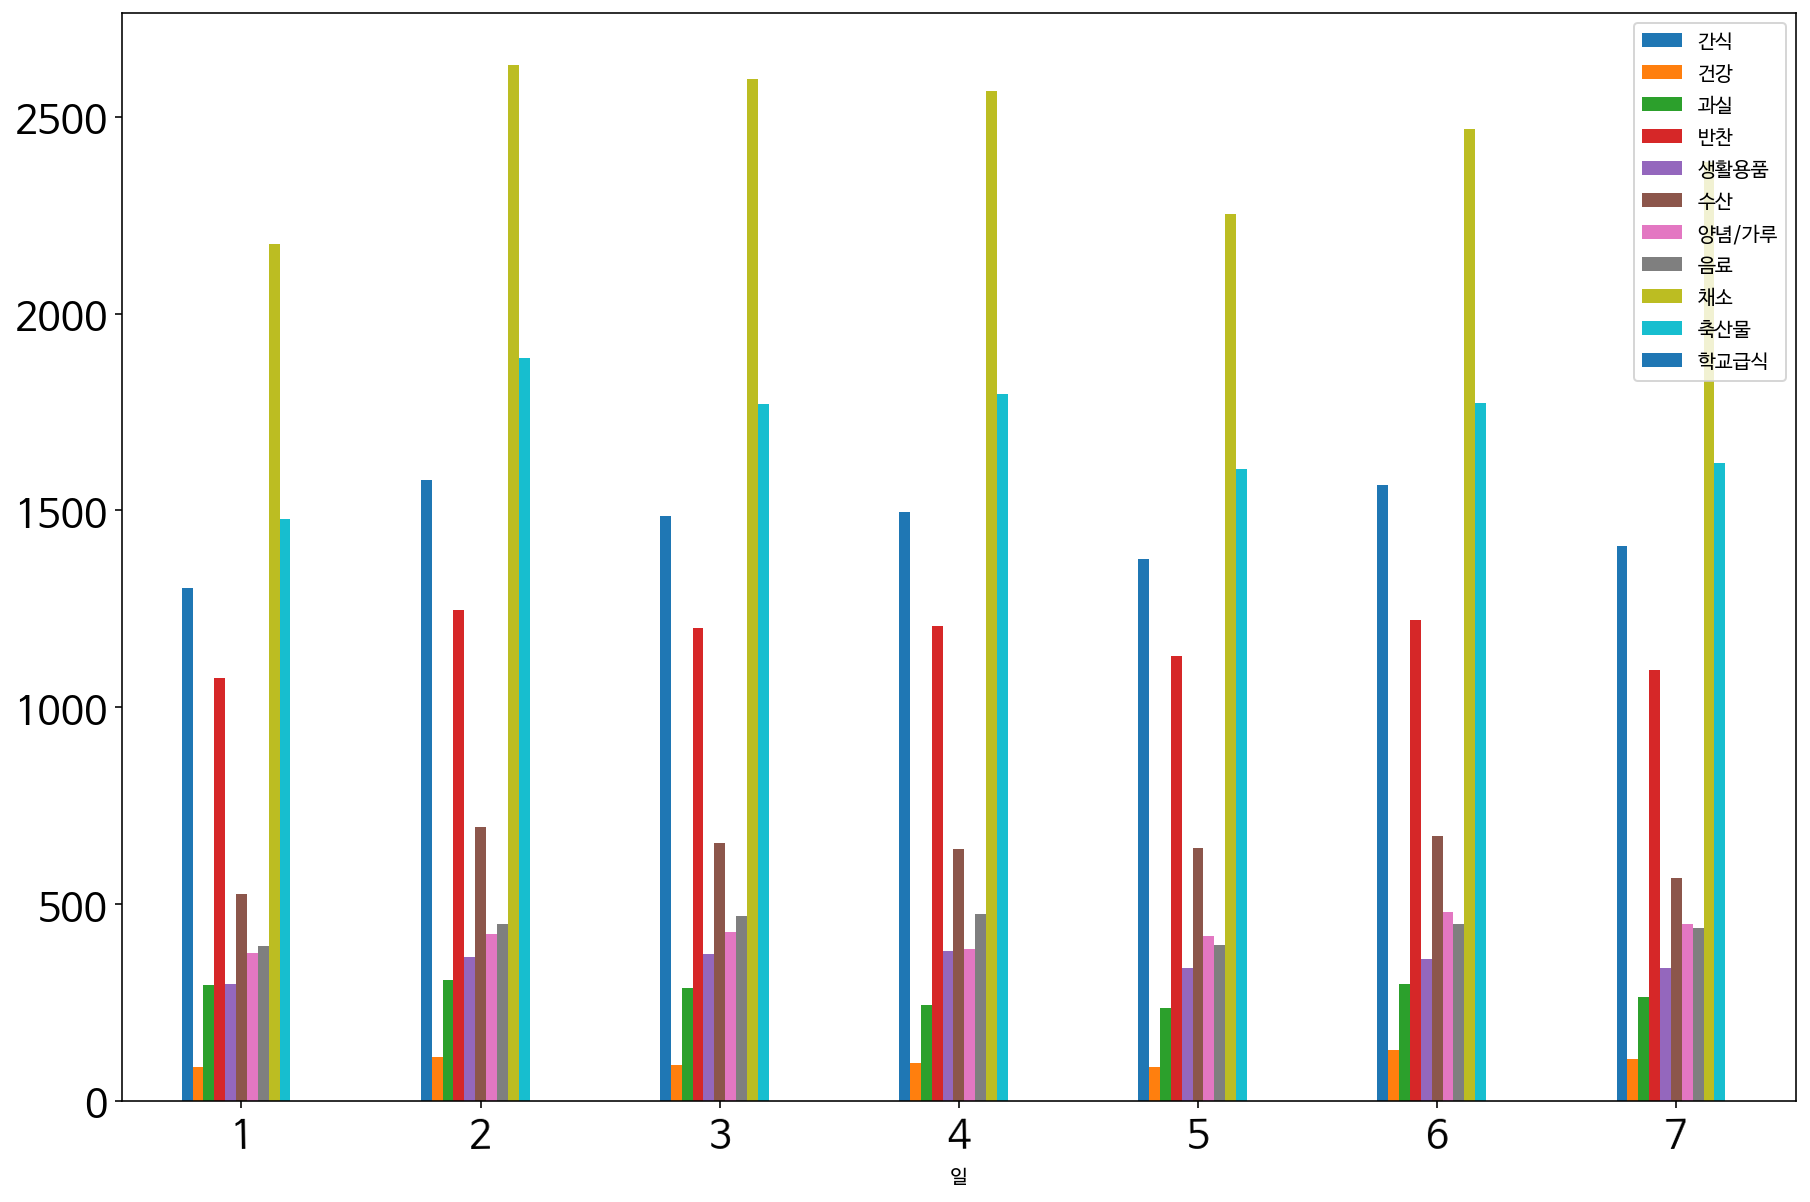

In [ ]:
df_m_n1.plot.bar(figsize = (15,10),fontsize = 20)
plt.xticks(rotation = True)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

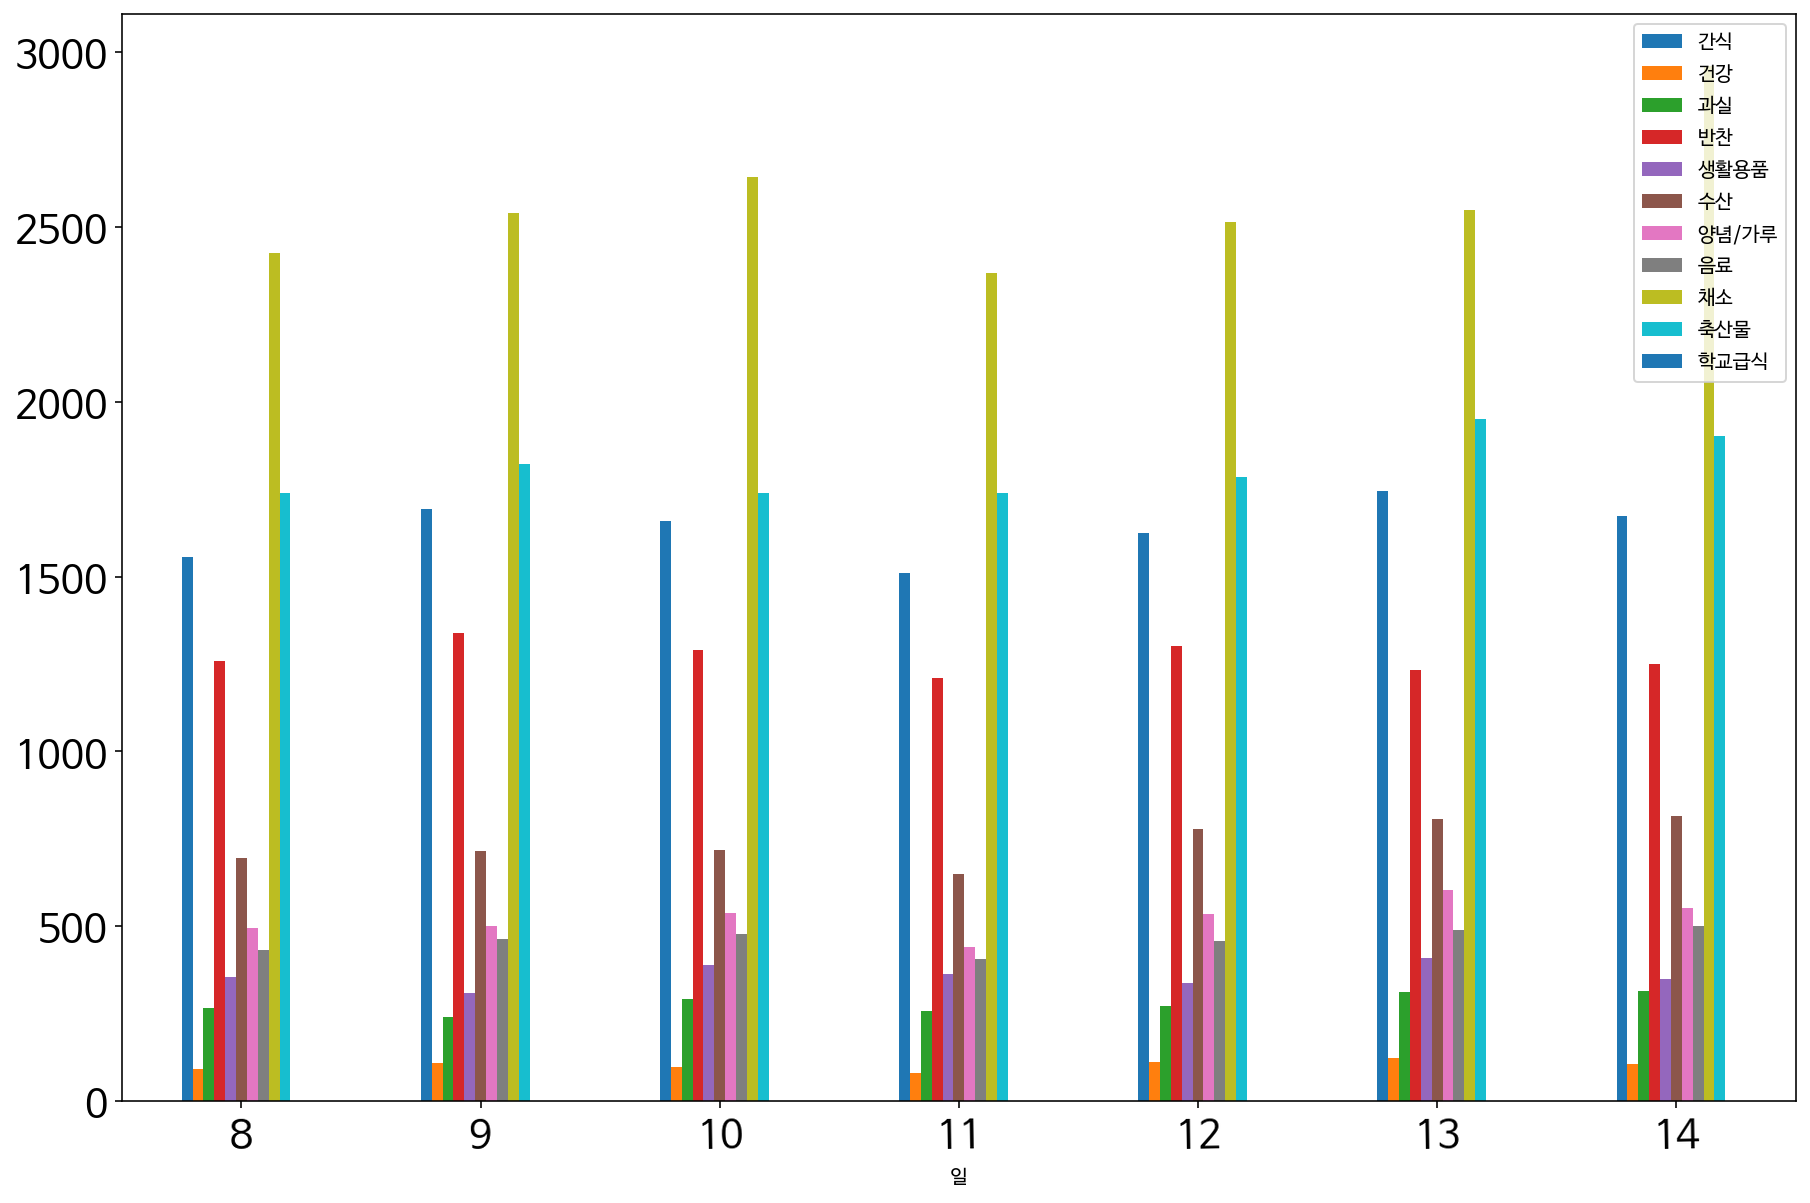

In [ ]:
df_m_n2.plot.bar(figsize = (15,10),fontsize = 20)
plt.xticks(rotation = True)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

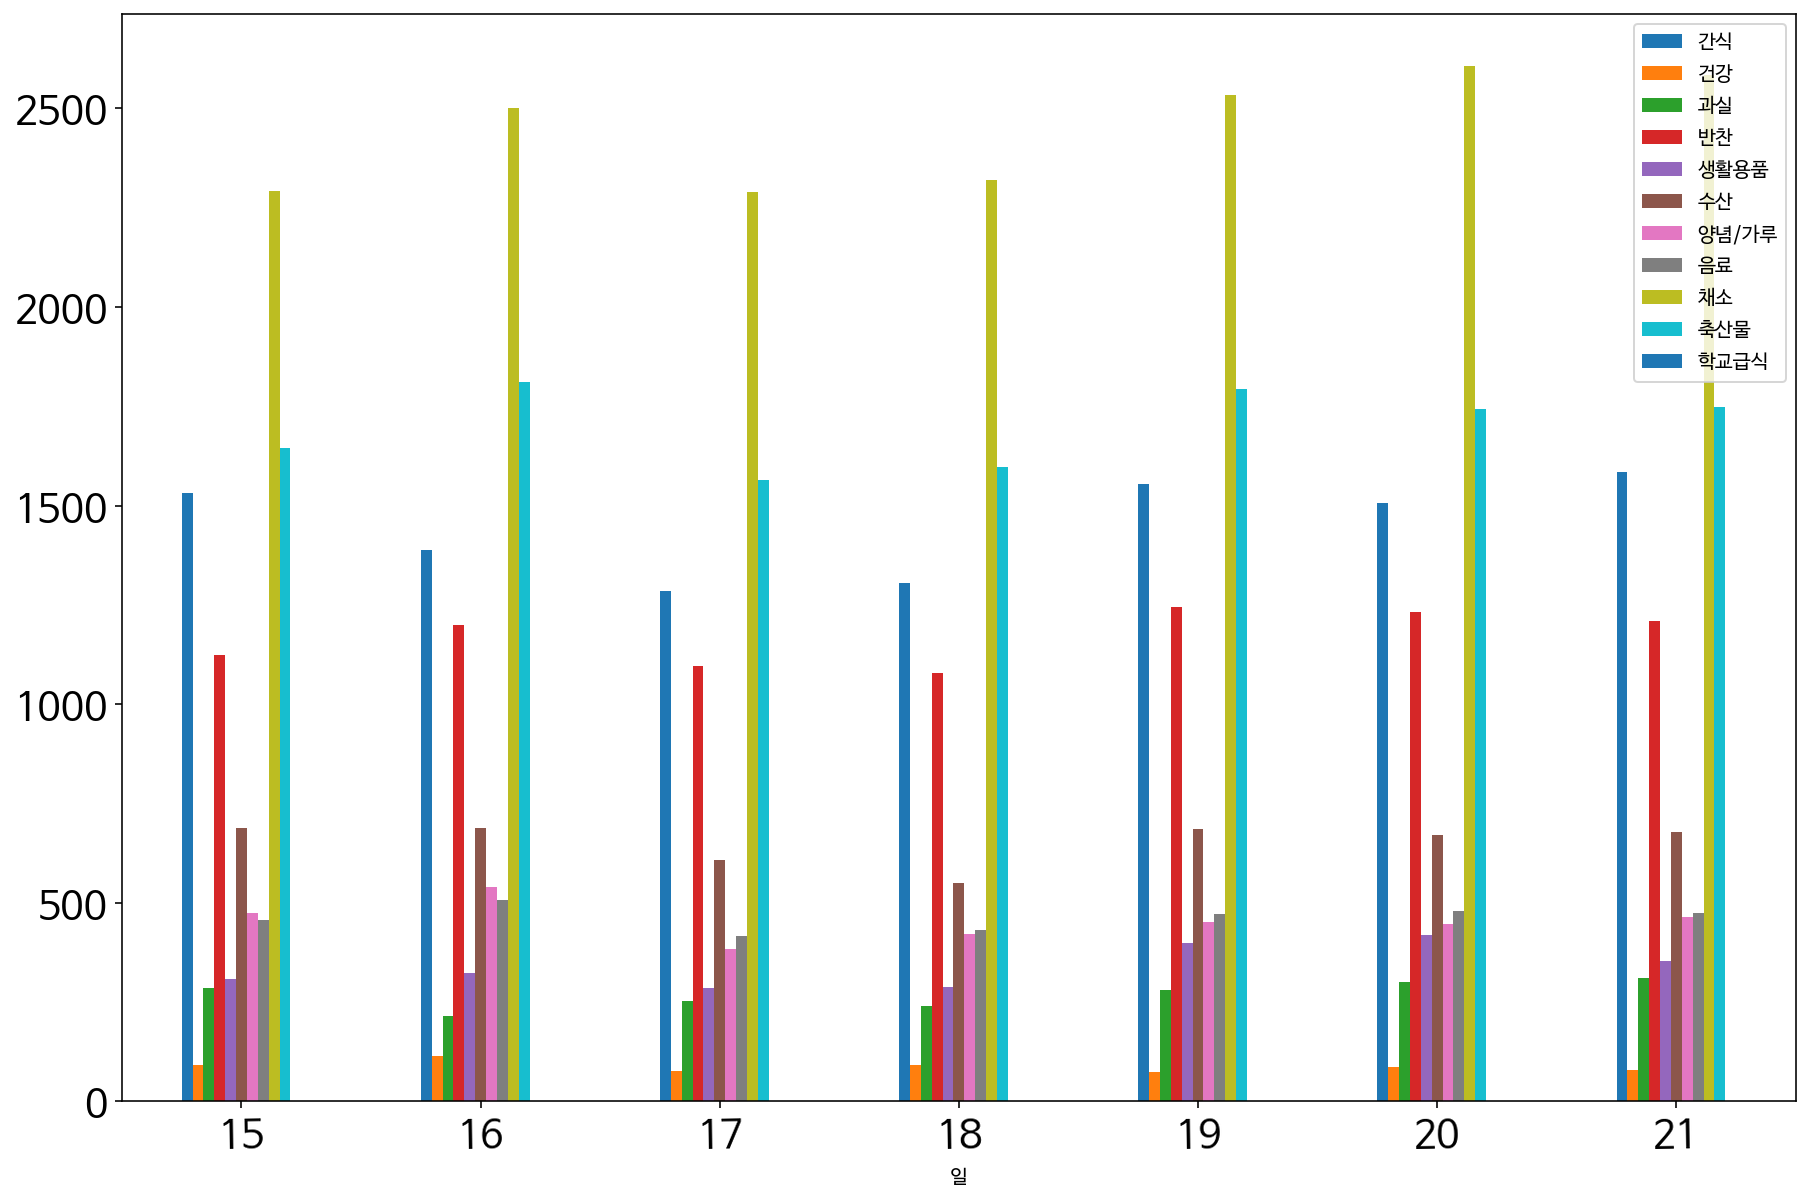

In [ ]:
df_m_n3.plot.bar(figsize = (15,10),fontsize = 20)
plt.xticks(rotation = True)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

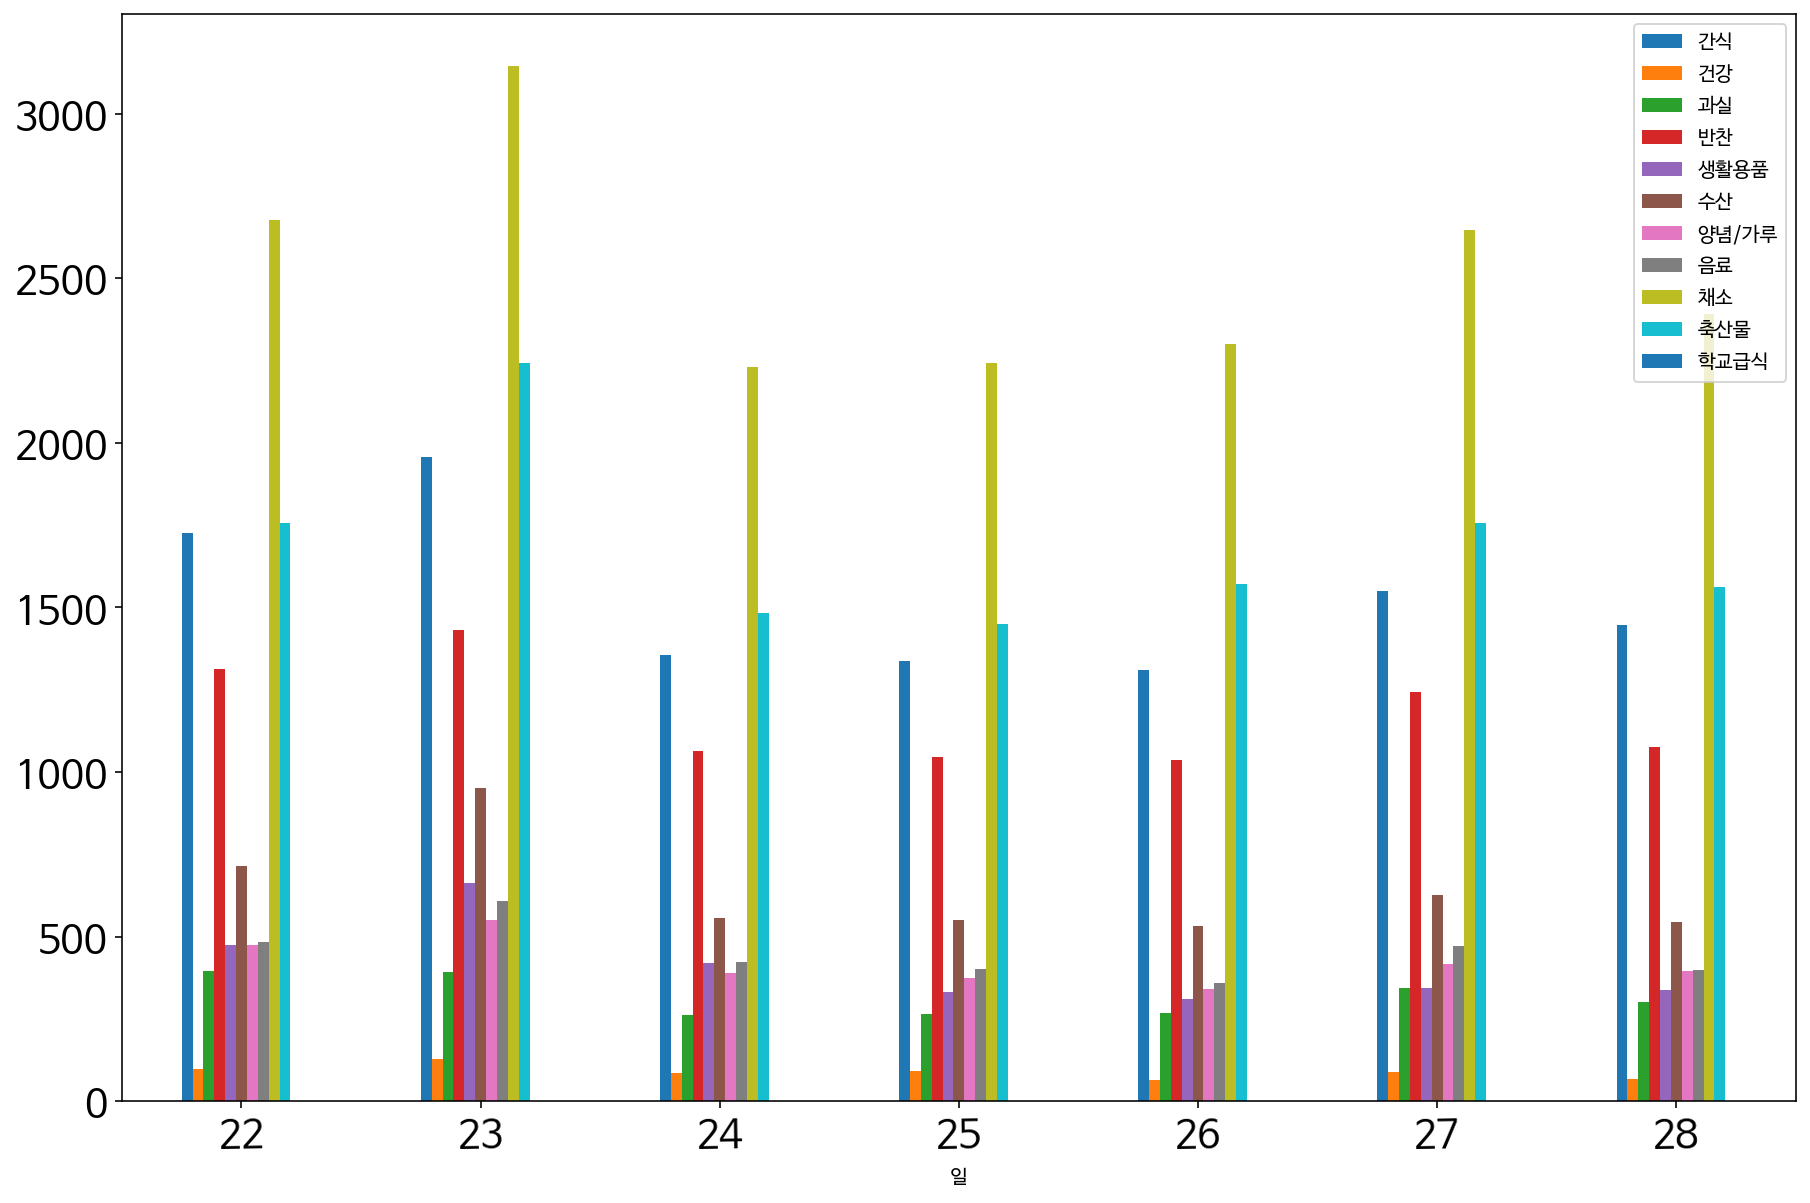

In [ ]:
df_m_n4.plot.bar(figsize = (15,10),fontsize = 20)
plt.xticks(rotation = True)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

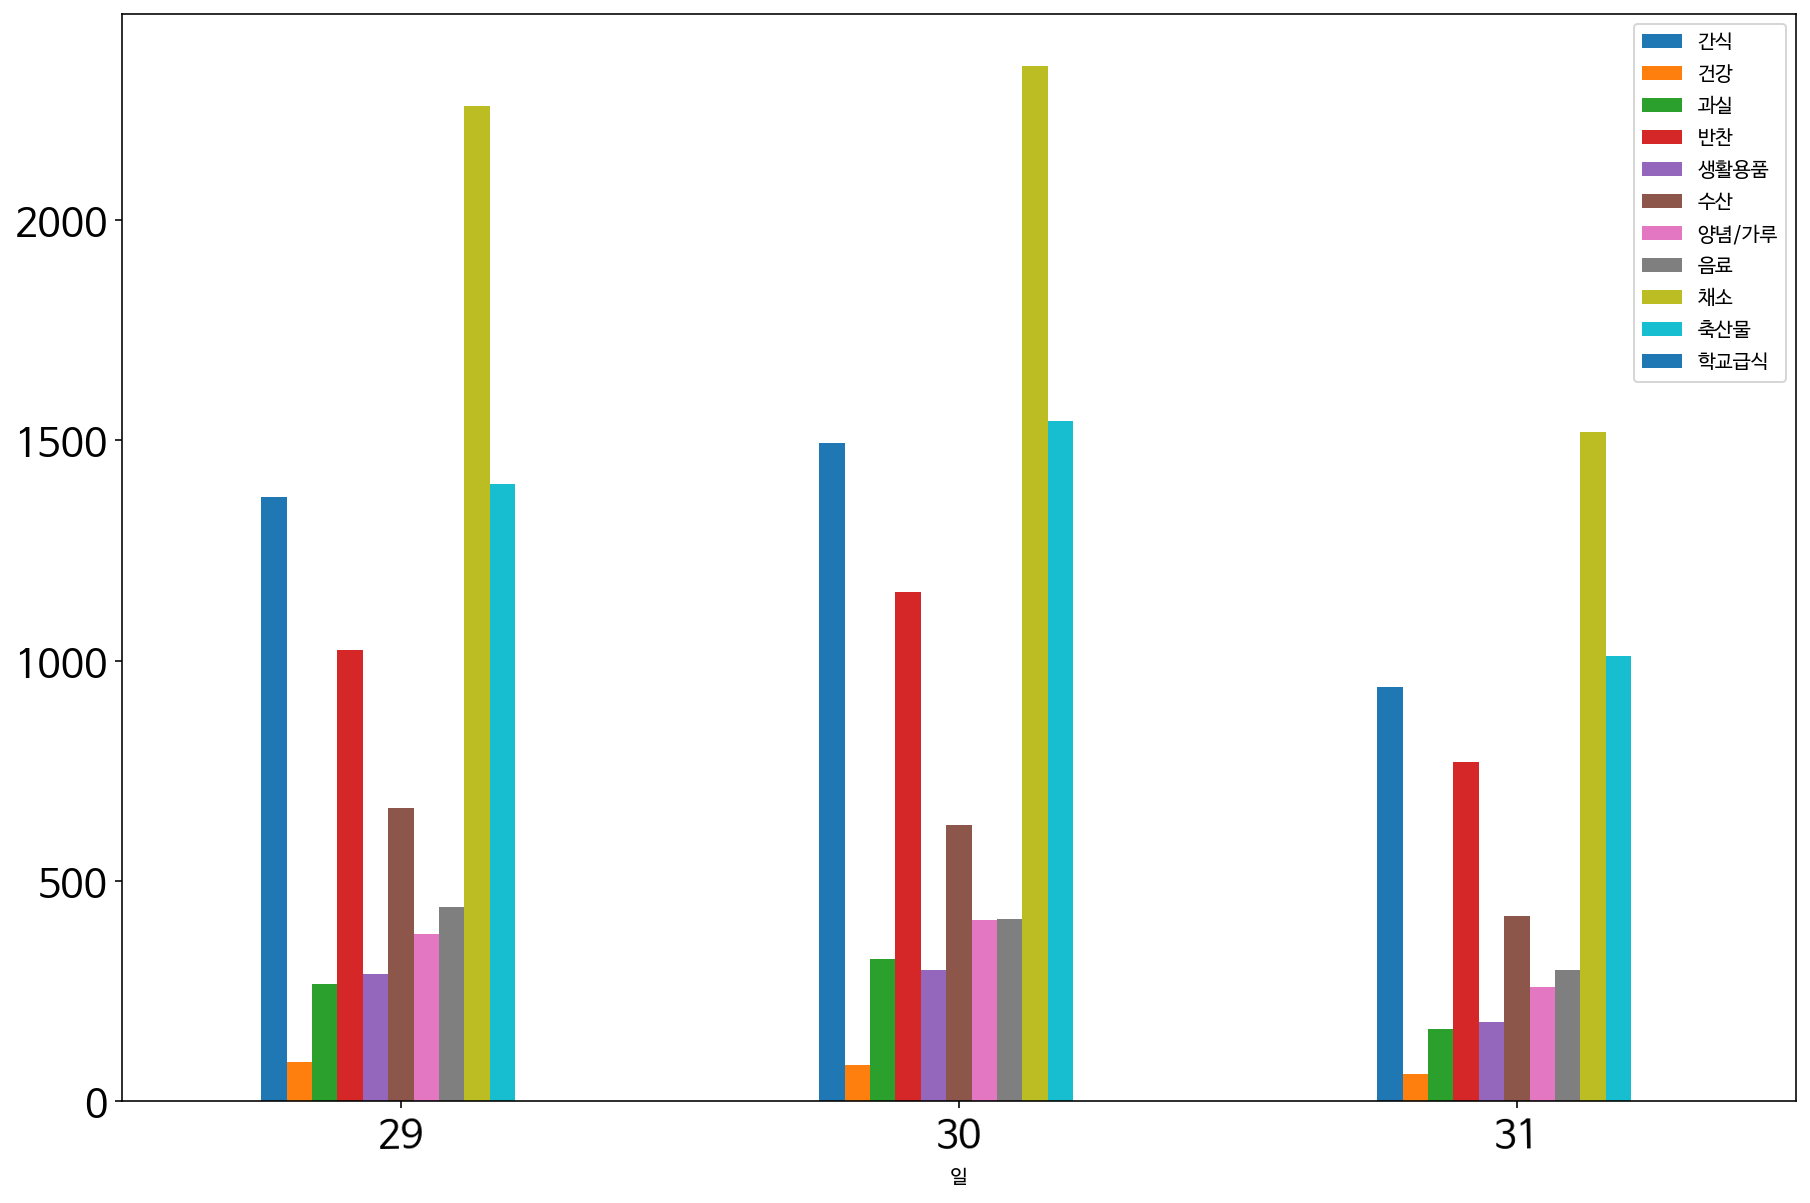

In [ ]:
df_m_n5.plot.bar(figsize = (15,10),fontsize = 20)
plt.xticks(rotation = True)

In [ ]:
# fig, ax = plt.subplots(figsize = (15,15))
# ax.boxplot([df_member_x_1['총구매액'],df_member_x_2['총구매액']])
# ax.yaxis.grid(True, linestyle='-', which='major', color='black',alpha=0.5)
# plt.title('VIP and normal purchase amount', fontsize = 20)
# plt.xticks([1, 2],  ['VIP 총구매액', 'normal 총구매액'], fontsize = 20)
# plt.ylabel('Purcahse amount (\)', fontsize = 20)
# plt.show()

# fig, ax = plt.subplots(figsize = (10,10))
# ax.boxplot([df_member_x_1['총방문횟수'],df_member_x_2['총방문횟수']])
# ax.yaxis.grid(True, linestyle='-', which='major', color='black',alpha=0.5)
# plt.title('VIP and normal purchase amount', fontsize = 20)
# plt.xticks([1, 2],  ['VIP 총방문횟수', 'normal 총방문횟수'], fontsize = 20)
# plt.ylabel('Visiting count', fontsize = 20)
# plt.show()

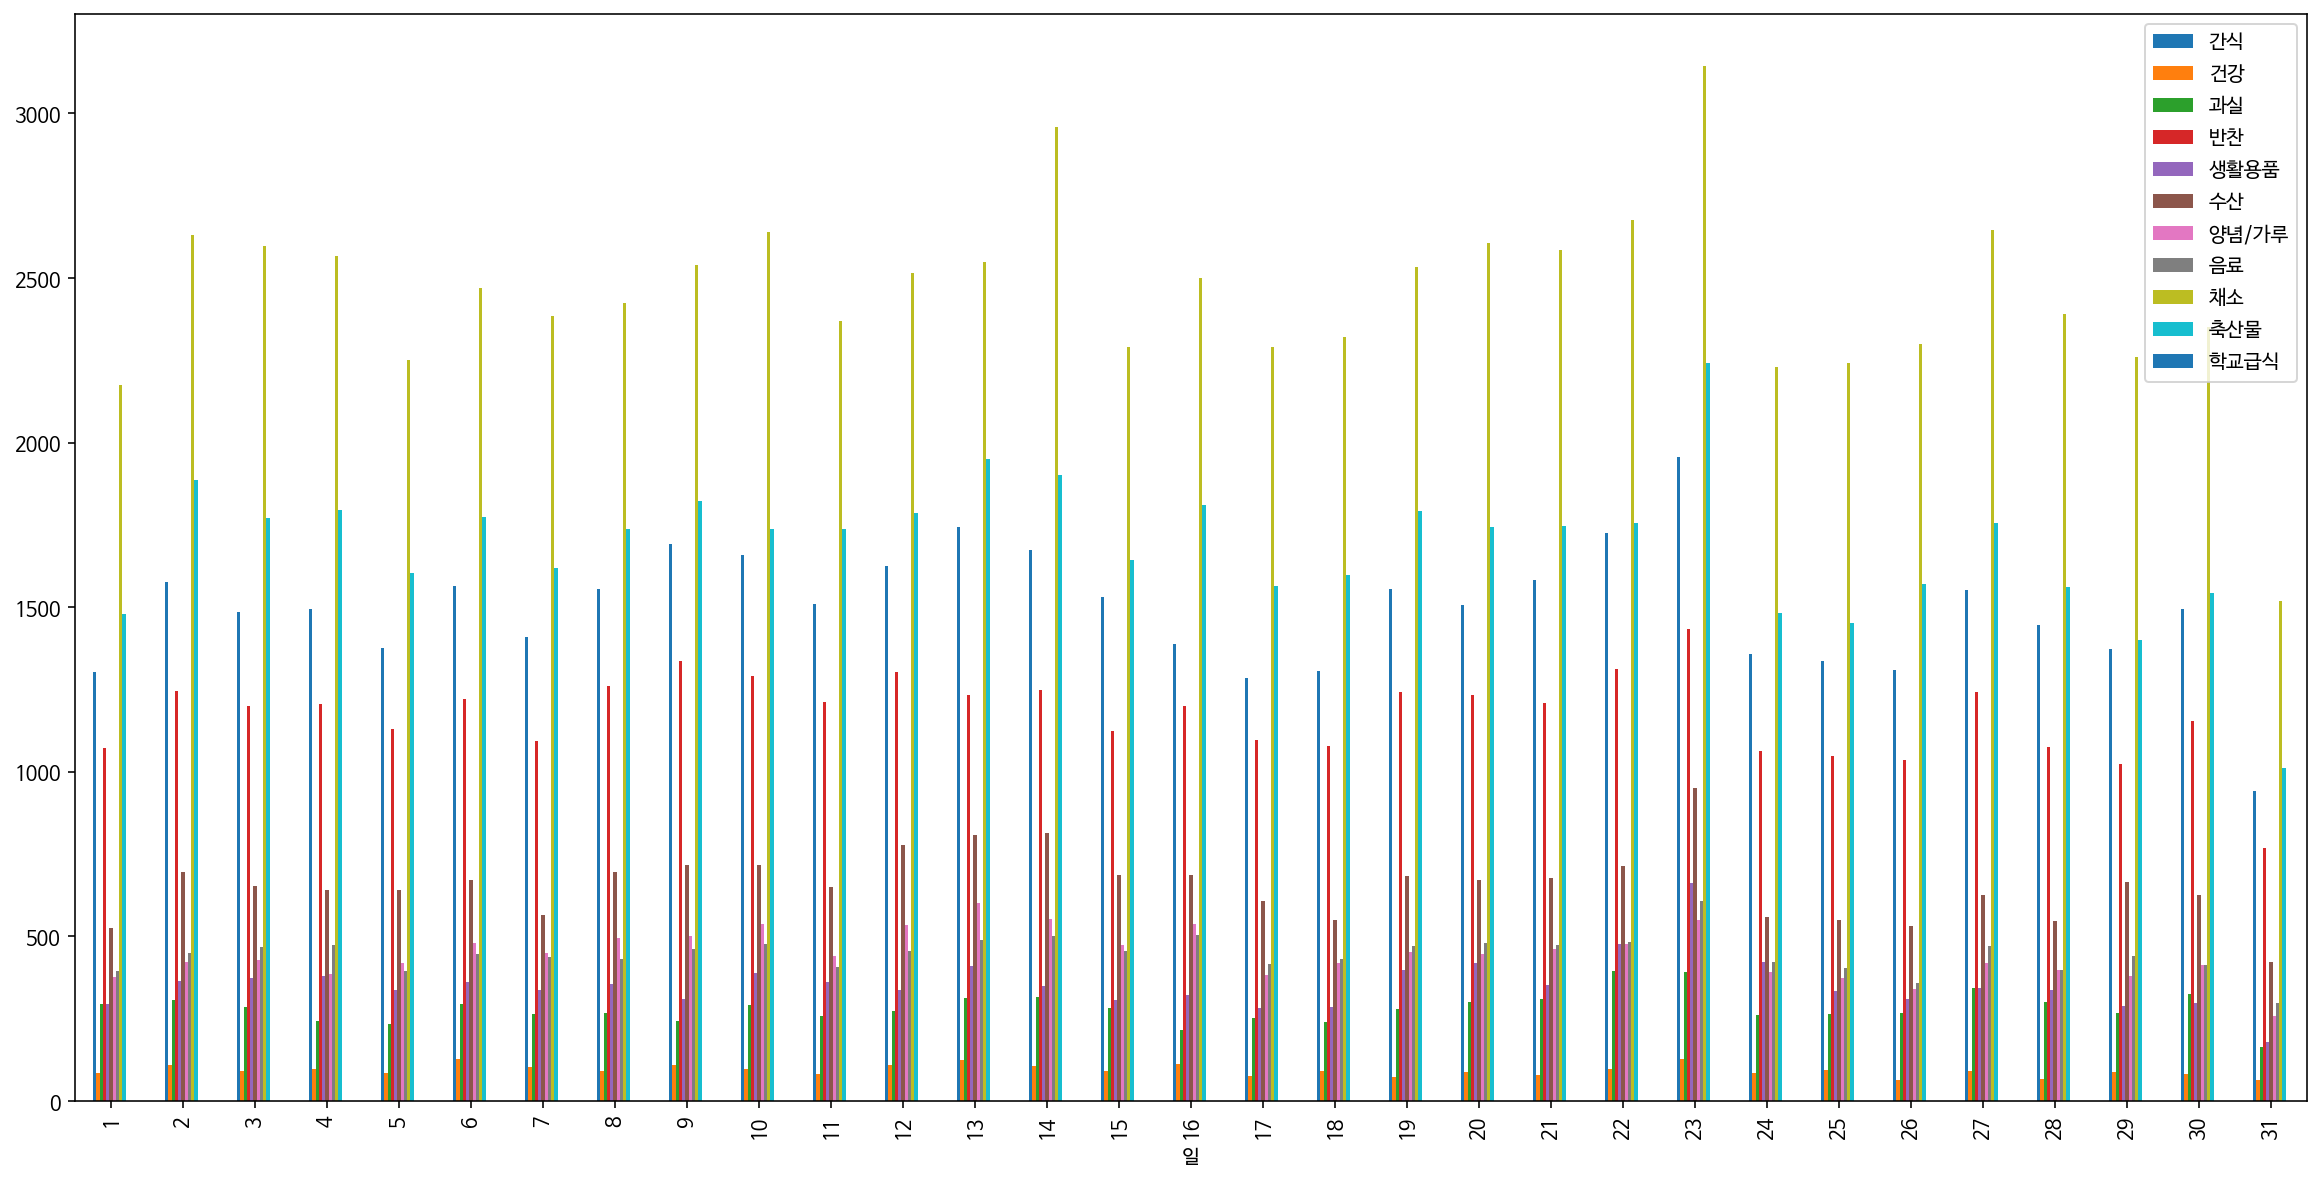

In [ ]:
df_m_n.plot.bar(figsize = (20,10))

In [ ]:
data = df[['물품대분류','일','구매금액']]
df = data.groupby(['일', '물품대분류'], as_index=False).sum()
df


## <font color='Blue'><div style="text-align: left">시계열 분석 전처리 및 초반부분 </font> 

In [ ]:
df = pd.read_csv('/content/drive/My Drive/(개인)_AI _빅데이터_아카데미/B1_마켓_DataSet/product_member_data.csv',engine='python',encoding='euc-kr')
df.head()

,Unnamed: 0,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,hour,연령,연령대,주소,성별,배송서비스신청여부,모바일알람여부,Gold_member
0,0,2018-01-02,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04,10,45,40,수지구-풍덕천동,여,미신청,수신,VIP
1,1,2018-01-02,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09,10,34,30,수지구-풍덕천동,여,미신청,.,normal
2,2,2018-01-02,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12,10,51,50,수지구-성복동,여,신청,.,normal
3,3,2018-01-02,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23,10,69,60,수지구-풍덕천동,여,미신청,.,VIP
4,4,2018-01-02,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29,10,73,70,수지구-풍덕천동,여,미신청,.,normal


In [ ]:
df_a = df[['공급일자','구매금액']]
df_a.head()

,공급일자,구매금액
0,2018-01-02,22207
1,2018-01-02,4403
2,2018-01-02,7083
3,2018-01-02,7849
4,2018-01-02,15507


In [ ]:
df_a['공급일자'] = df_a['공급일자'].astype('datetime64[ns]')
df_a.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


공급일자    datetime64[ns]
구매금액             int64
dtype: object

In [ ]:
df_a.head()

,공급일자,구매금액
0,2018-01-02,22207
1,2018-01-02,4403
2,2018-01-02,7083
3,2018-01-02,7849
4,2018-01-02,15507


In [ ]:
df_a = df_a.groupby('공급일자').sum()
df_a.head()

,구매금액
공급일자,
2018-01-02,13826547
2018-01-03,12229372
2018-01-04,10294241
2018-01-05,11791477
2018-01-06,11678189


In [ ]:
# df_a = df_a.reset_index()
# df_a.head()

In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
df_a.plot("공급일자","구매금액",figsize = (50,15))

KeyError: ignored

In [ ]:
train_size = 0.9
len_idx = len(df_a.index)
mask=(np.arange(len_idx) / len_idx) < train_size
mask

In [ ]:
df_train = df_a[mask]
df_test = df_a[~mask]
print('shape :', df_train.shape)
print('shape :', df_test.shape)

In [ ]:
df_diff1=df_train - df_train.shift(1)
df_diff1.plot(figsize =(50,15))

In [ ]:
df_diff2=df_train -2 * (df_train.shift(1)) + (df_train.shift(2))
df_diff2.plot(figsize=(50,15))

In [ ]:
lag_size=30
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df_train, lags=lag_size, ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df_train, lags=lag_size, ax=ax2)

In [ ]:
ts_model=ARIMA(df_train, order=(4,2,3))
ts_result=ts_model.fit(trend="nc", full_output=True)
print(ts_result.summary())